Quantum Circuit:
        ┌───┐      ░          ░ ┌─┐      
   q_0: ┤ H ├──■───░──────────░─┤M├──────
        └───┘┌─┴─┐ ░          ░ └╥┘┌─┐   
   q_1: ─────┤ X ├─░───────■──░──╫─┤M├───
             └───┘ ░ ┌───┐ │  ░  ║ └╥┘┌─┐
   q_2: ───────────░─┤ X ├─■──░──╫──╫─┤M├
                   ░ └───┘    ░  ║  ║ └╥┘
meas: 3/═════════════════════════╩══╩══╩═
                                 0  1  2 

Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1], q[2];
x q[2];
cz q[1], q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];


QASM Syntax Reference:
Hadamard gate  →  h q[0];
CNOT gate      →  cx q[0], q[1];
Barrier        →  barrier q[0], q[1], q[2];

Simulation Result:
{'111': 518, '100': 506}


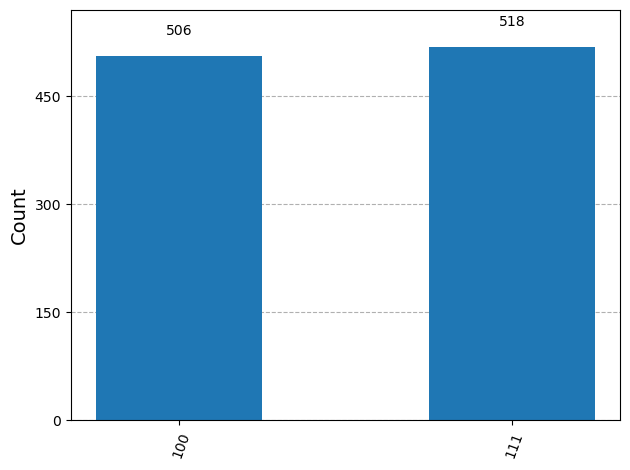

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3  # For OpenQASM 3 export
from qiskit.visualization import plot_histogram

# 1️⃣ Create a 3-qubit quantum circuit
qc = QuantumCircuit(3)
qc.h(0)          # Hadamard gate on qubit 0
qc.cx(0, 1)      # CNOT gate (control: 0, target: 1)
qc.barrier()     # Barrier added to separate logical sections
qc.x(2)          # Pauli-X gate on qubit 2
qc.cz(1, 2)      # Controlled-Z gate between qubit 1 and 2
qc.measure_all() # Measure all qubits

print("Quantum Circuit:")
print(qc.draw())

# 2️⃣ Convert the circuit to OpenQASM 3 format
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)

# 3️⃣ Explain key QASM operations
print("\nQASM Syntax Reference:")
print("Hadamard gate  →  h q[0];")
print("CNOT gate      →  cx q[0], q[1];")
print("Barrier        →  barrier q[0], q[1], q[2];")

# 4️⃣ Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()
print("\nSimulation Result:")
print(counts)

# 5️⃣ Optional: Display histogram of results
plot_histogram(counts)
